In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Downloads/1691_2961_compressed_Suicides in India 2001-2012.csv/Suicides in India 2001-2012.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [6]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [7]:
df.tail()

,State,Year,Type_code,Type,Gender,Age_group,Total
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189
237518,West Bengal,2012,Social_Status,Never Married,Male,0-100+,2658


# Suicides commited from 2001 - 2012

As we see from data here , there has been a gradually increse in the number of suicides but as we approach to the 2012 it has hit its peak and it's decreasing .

Total cases from 2001-12: 
 Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64


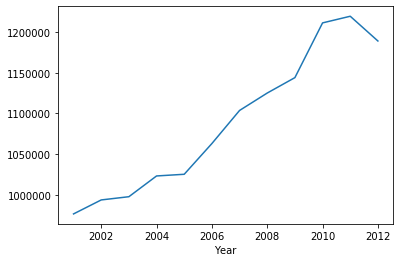

In [12]:
print("Total cases from 2001-12: \n",df.groupby("Year")["Total"].sum())
df.groupby("Year")["Total"].sum().plot(kind="line")

In [13]:
eduDf = df[df['Type_code']=='Education_Status']
causesDf = df[df['Type_code']=='Causes']
meansDf = df[df['Type_code']=='Means_adopted']
profDf = df[df['Type_code']=='Professional_Profile']
socialDf = df[df['Type_code']=='Social_Status']

# Suicides based on the Education status of people

A student commits suicide in India every hour; how can our educational system prevent this? Pressure from parents to perform well in exams can affect a child's mental health. ... 12 per cent of Indian students between the age of 4 and 16 suffer from psychiatric disorders

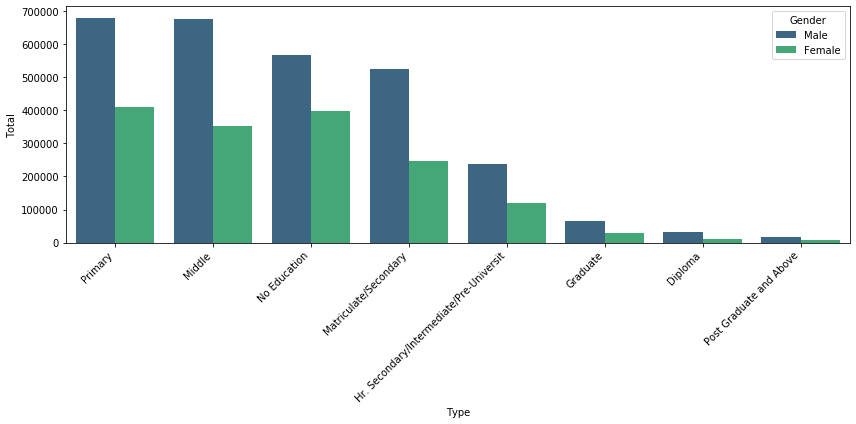

In [14]:
plt.figure(figsize=(12,6))
eduDf = eduDf[['Type','Gender','Total']]
edSort = eduDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',hue='Gender',data=edSort,palette='viridis')
plt.xticks(rotation= 45,ha='right')
plt.tight_layout()

# DIStribution on number of suicides on the basis of Social status

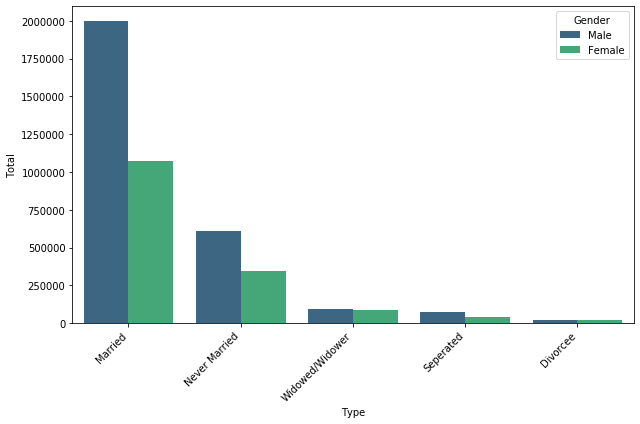

In [8]:
plt.figure(figsize=(9,6))
socialDf = socialDf[['Type','Gender','Total']]
socialSort = socialDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=socialSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

# Which age group people tend to commit more suicide?

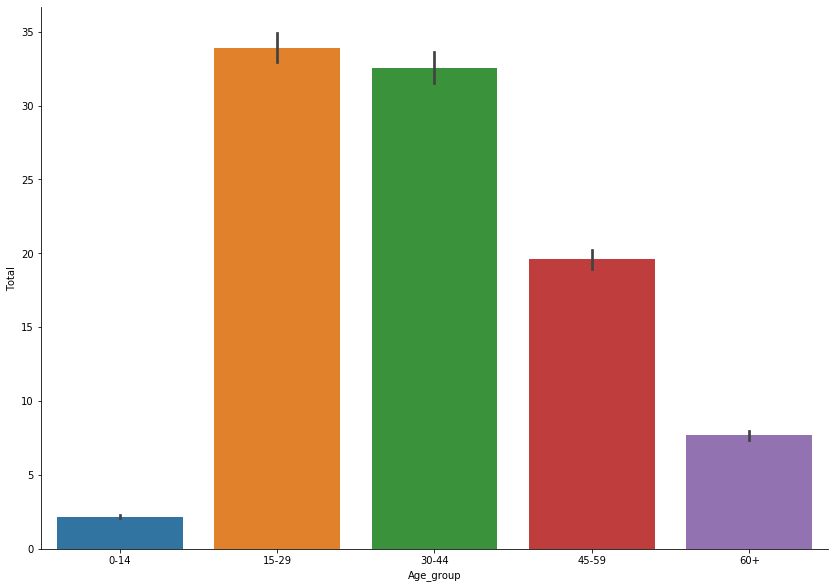

In [9]:
filter_age = df[df["Age_group"]!="0-100+"]
sns.catplot(x="Age_group", y="Total", kind="bar", data=filter_age,height=8.27, aspect=11.7/8.27);

#  Change in Number of cases over the time (2002-2012)

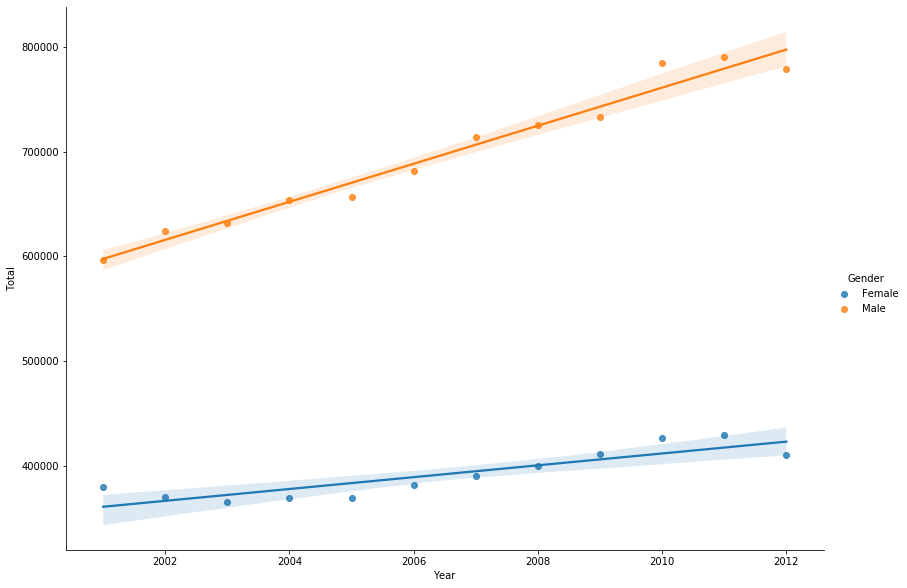

In [12]:
grouped_year = df.groupby(["Year","Gender"])["Total"].sum()
grouped_year = pd.DataFrame(grouped_year).reset_index()
# grouped_year
sns.lmplot(x="Year", y="Total", hue="Gender", data=grouped_year,height=8.27, aspect=11.7/8.27);

#  Cases on the bassis of the reason of suicide

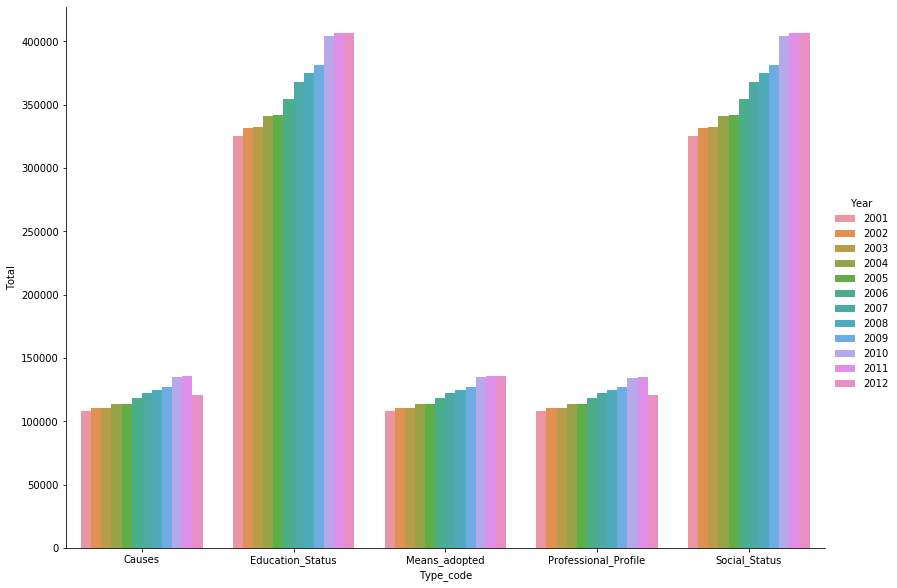

In [13]:
filter_type_code = pd.DataFrame(df.groupby(["Type_code","Year"])["Total"].sum()).reset_index()
filter_type_code
sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", data=filter_type_code,height=8.27, aspect=11.7/8.27);

The World Health Organization estimates that approximately 1 million people die each year from suicide. What drives so many individuals to take their own lives? To those who are not in the grips of suicidal depression and despair, it’s difficult to understand what drives so many individuals to take their own lives. But a suicidal person is in so much pain that he or she can see no other option.

Suicide is a desperate attempt to escape suffering that has become unbearable. Blinded by feelings of self-loathing, hopelessness, and isolation, a suicidal person can’t see any way of finding relief except through death. But despite their desire for the pain to stop, most suicidal people are deeply conflicted about ending their own lives. They wish there was an alternative to suicide, but they just can’t see one.

I have created this bar chart race related to this data with some help  so check that out with this link 
          https://public.flourish.studio/visualisation/2897257/